<a href="https://colab.research.google.com/github/Geberty/USTspecialTopics2026spring/blob/main/assign_3_Convolv_MNIST_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Introduction to Deep Learning with Keras and TensorFlow

**Daniel Moser (UT Southwestern Medical Center)**

**Resources: [Xavier Snelgrove](https://github.com/wxs/keras-mnist-tutorial), [Yash Katariya](https://github.com/yashk2810/MNIST-Keras)**

## Prerequisite Python Modules

First, some software needs to be loaded into the Python environment.

In [2]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import to_categorical                         # NumPy related tools

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [3]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [6]:
print("\n--- Creating a model with half the training data ---\n")

# Halve the training data
X_train_half = X_train[:len(X_train)//2]
Y_train_half = Y_train[:len(Y_train)//2]

print("New X_train_half shape:", X_train_half.shape)
print("New Y_train_half shape:", Y_train_half.shape)

# Re-initialize the model (using a new variable name to avoid overwriting the previous model)
model_half_data = Sequential()

# First hidden layer
model_half_data.add(Dense(512, input_shape=(784,))) # (784,) is not a typo -- that represents a 784 length vector!
model_half_data.add(Activation('relu'))
model_half_data.add(Dropout(0.2))

# Second hidden layer
model_half_data.add(Dense(512))
model_half_data.add(Activation('relu'))
model_half_data.add(Dropout(0.2))

# Final output layer
model_half_data.add(Dense(10))
model_half_data.add(Activation('softmax'))

# Compile the model
model_half_data.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
print("\nModel summary for the new model (trained on half data):")
model_half_data.summary()

# Train the model with half the data
print("\nTraining model with half the data...")
history_half_data = model_half_data.fit(X_train_half, Y_train_half,
                                      batch_size=128, epochs=5,
                                      verbose=1)

# Evaluate the model on the original test data
score_half_data = model_half_data.evaluate(X_test, Y_test, verbose=0)
print('\nTest score with half data:', score_half_data[0])
print('Test accuracy with half data:', score_half_data[1])



--- Creating a model with half the training data ---

New X_train_half shape: (30000, 784)
New Y_train_half shape: (30000, 10)

Model summary for the new model (trained on half data):


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)


Training model with half the data...
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8208 - loss: 0.5999
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9566 - loss: 0.1391
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9705 - loss: 0.0952
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9780 - loss: 0.0690
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9847 - loss: 0.0509

Test score with half data: 0.08294972777366638
Test accuracy with half data: 0.9750999808311462


In [7]:
print("\n--- Creating a model with full training data ---\n")

# Full training data is already X_train and Y_train
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

# Re-initialize the model for full data
model_full_data_new = Sequential()

# First hidden layer
model_full_data_new.add(Dense(512, input_shape=(784,))) # (784,) is not a typo -- that represents a 784 length vector!
model_full_data_new.add(Activation('relu'))
model_full_data_new.add(Dropout(0.2))

# Second hidden layer
model_full_data_new.add(Dense(512))
model_full_data_new.add(Activation('relu'))
model_full_data_new.add(Dropout(0.2))

# Final output layer
model_full_data_new.add(Dense(10))
model_full_data_new.add(Activation('softmax'))

# Compile the model
model_full_data_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
print("\nModel summary for the new model (trained on full data):")
model_full_data_new.summary()

# Train the model with full data
print("\nTraining model with full data...")
history_full_data_new = model_full_data_new.fit(X_train, Y_train,
                                      batch_size=128, epochs=5,
                                      verbose=1)

# Evaluate the model on the original test data
score_full_data_new = model_full_data_new.evaluate(X_test, Y_test, verbose=0)
print('\nTest score with full data:', score_full_data_new[0])
print('Test accuracy with full data:', score_full_data_new[1])


--- Creating a model with full training data ---

X_train shape: (60000, 784)
Y_train shape: (60000, 10)

Model summary for the new model (trained on full data):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)


Training model with full data...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8617 - loss: 0.4491
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9700 - loss: 0.0984
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9776 - loss: 0.0695
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9829 - loss: 0.0520
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9859 - loss: 0.0430

Test score with full data: 0.06666800379753113
Test accuracy with full data: 0.9782999753952026


In [8]:
print("\n--- Creating a model with a quarter of the training data ---\n")

# Quarter the training data
X_train_quarter = X_train[:len(X_train)//4]
Y_train_quarter = Y_train[:len(Y_train)//4]

print("New X_train_quarter shape:", X_train_quarter.shape)
print("New Y_train_quarter shape:", Y_train_quarter.shape)

# Re-initialize the model for quarter data
model_quarter_data = Sequential()

# First hidden layer
model_quarter_data.add(Dense(512, input_shape=(784,))) # (784,) is not a typo -- that represents a 784 length vector!
model_quarter_data.add(Activation('relu'))
model_quarter_data.add(Dropout(0.2))

# Second hidden layer
model_quarter_data.add(Dense(512))
model_quarter_data.add(Activation('relu'))
model_quarter_data.add(Dropout(0.2))

# Final output layer
model_quarter_data.add(Dense(10))
model_quarter_data.add(Activation('softmax'))

# Compile the model
model_quarter_data.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
print("\nModel summary for the new model (trained on quarter data):")
model_quarter_data.summary()

# Train the model with quarter the data
print("\nTraining model with quarter the data...")
history_quarter_data = model_quarter_data.fit(X_train_quarter, Y_train_quarter,
                                      batch_size=128, epochs=5,
                                      verbose=1)

# Evaluate the model on the original test data
score_quarter_data = model_quarter_data.evaluate(X_test, Y_test, verbose=0)
print('\nTest score with quarter data:', score_quarter_data[0])
print('Test accuracy with quarter data:', score_quarter_data[1])


--- Creating a model with a quarter of the training data ---

New X_train_quarter shape: (15000, 784)
New Y_train_quarter shape: (15000, 10)

Model summary for the new model (trained on quarter data):


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)


Training model with quarter the data...
Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7616 - loss: 0.8171
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9443 - loss: 0.1951
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9594 - loss: 0.1368
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9765 - loss: 0.0808
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9795 - loss: 0.0696

Test score with quarter data: 0.1285402476787567
Test accuracy with quarter data: 0.9607999920845032


In [9]:
print("\n--- Creating a model with three quarters of the training data ---\n")

# Get three quarters of the training data
X_train_three_quarter = X_train[:int(len(X_train) * 0.75)]
Y_train_three_quarter = Y_train[:int(len(Y_train) * 0.75)]

print("New X_train_three_quarter shape:", X_train_three_quarter.shape)
print("New Y_train_three_quarter shape:", Y_train_three_quarter.shape)

# Re-initialize the model for three-quarter data
model_three_quarter_data = Sequential()

# First hidden layer
model_three_quarter_data.add(Dense(512, input_shape=(784,))) # (784,) is not a typo -- that represents a 784 length vector!
model_three_quarter_data.add(Activation('relu'))
model_three_quarter_data.add(Dropout(0.2))

# Second hidden layer
model_three_quarter_data.add(Dense(512))
model_three_quarter_data.add(Activation('relu'))
model_three_quarter_data.add(Dropout(0.2))

# Final output layer
model_three_quarter_data.add(Dense(10))
model_three_quarter_data.add(Activation('softmax'))

# Compile the model
model_three_quarter_data.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
print("\nModel summary for the new model (trained on three-quarter data):")
model_three_quarter_data.summary()

# Train the model with three-quarter the data
print("\nTraining model with three-quarter the data...")
history_three_quarter_data = model_three_quarter_data.fit(X_train_three_quarter, Y_train_three_quarter,
                                      batch_size=128, epochs=5,
                                      verbose=1)

# Evaluate the model on the original test data
score_three_quarter_data = model_three_quarter_data.evaluate(X_test, Y_test, verbose=0)
print('\nTest score with three-quarter data:', score_three_quarter_data[0])
print('Test accuracy with three-quarter data:', score_three_quarter_data[1])


--- Creating a model with three quarters of the training data ---

New X_train_three_quarter shape: (45000, 784)
New Y_train_three_quarter shape: (45000, 10)

Model summary for the new model (trained on three-quarter data):


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)


Training model with three-quarter the data...
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8421 - loss: 0.5164
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9628 - loss: 0.1170
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9770 - loss: 0.0754
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9817 - loss: 0.0577
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9850 - loss: 0.0472

Test score with three-quarter data: 0.07541673630475998
Test accuracy with three-quarter data: 0.977400004863739


In [11]:
import pandas as pd

# Data for the model trained on full data
full_data_accuracy = score_full_data_new[1]
full_data_length = len(X_train)

# Data for the model trained on half data
half_data_accuracy = score_half_data[1]
half_data_length = len(X_train_half)

# Data for the model trained on quarter data
quarter_data_accuracy = score_quarter_data[1]
quarter_data_length = len(X_train_quarter)

# Data for the model trained on three-quarter data
three_quarter_data_accuracy = score_three_quarter_data[1]
three_quarter_data_length = len(X_train_three_quarter)

# Create a DataFrame
data = {
    'Model': ['Quarter Data', 'Half Data', 'Three Quarter Data', 'Full Data'],
    'Training Data Length': [quarter_data_length, half_data_length, three_quarter_data_length, full_data_length],
    'Test Accuracy': [quarter_data_accuracy, half_data_accuracy, three_quarter_data_accuracy, full_data_accuracy]
}

fullyconnecteddata = pd.DataFrame(data)

print("\n--- Fully Connected Model Performance Summary ---\n")
print(fullyconnecteddata)


--- Fully Connected Model Performance Summary ---

                Model  Training Data Length  Test Accuracy
0        Quarter Data                 15000         0.9608
1           Half Data                 30000         0.9751
2  Three Quarter Data                 45000         0.9774
3           Full Data                 60000         0.9783


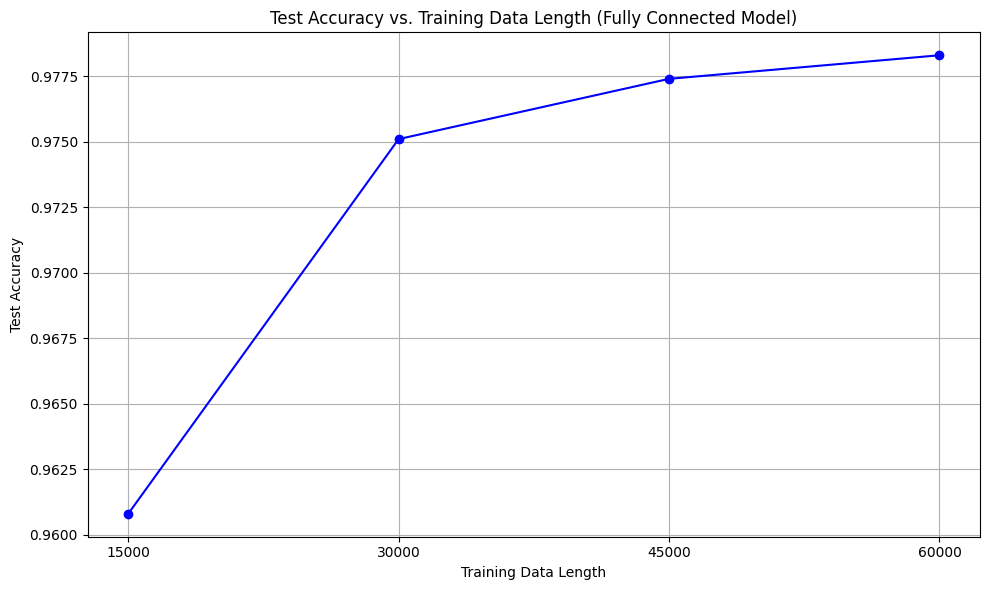

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(fullyconnecteddata['Training Data Length'], fullyconnecteddata['Test Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Test Accuracy vs. Training Data Length (Fully Connected Model)')
plt.xlabel('Training Data Length')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(fullyconnecteddata['Training Data Length'], [f'{length}' for length in fullyconnecteddata['Training Data Length']])
plt.tight_layout()
plt.show()

The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

# Introducing Convolution! What is it?

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

In the above example, the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

*Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

## Building a "Deep" Convolutional Neural Network

In [13]:
# import some additional tools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, BatchNormalization

In [14]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [20]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [21]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [22]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [23]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [24]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 191s 398ms/step - accuracy: 0.9152 - loss: 0.2703 - val_accuracy: 0.9814 - val_loss: 0.0642
Epoch 2/5
  1/468 ━━━━━━━━━━━━━━━━━━━━ 2:25 311ms/step - accuracy: 0.9766 - loss: 0.0710

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9766 - loss: 0.0710 - val_accuracy: 0.9818 - val_loss: 0.0650
Epoch 3/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 181s 386ms/step - accuracy: 0.9844 - loss: 0.0500 - val_accuracy: 0.9894 - val_loss: 0.0311
Epoch 4/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9890 - val_loss: 0.0321
Epoch 5/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 194s 384ms/step - accuracy: 0.9884 - loss: 0.0369 - val_accuracy: 0.9931 - val_loss: 0.0220


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9922 - loss: 0.0241
Test score: 0.021943751722574234
Test accuracy: 0.9930999875068665


In [25]:
print("\n--- Creating a convolutional model with one less convolutional layer using a quarter of the training data ---\n")

# Get one quarter of the training data for convolutional model
X_train_quarter_conv = X_train[:len(X_train)//4]
Y_train_quarter_conv = Y_train[:len(Y_train)//4]

print("New X_train_quarter_conv shape:", X_train_quarter_conv.shape)
print("New Y_train_quarter_conv shape:", Y_train_quarter_conv.shape)

model_less_conv = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model_less_conv.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model_less_conv.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv.add(Activation('relu'))                        # activation

# Convolution Layer 2
model_less_conv.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model_less_conv.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv.add(Activation('relu'))                        # activation
model_less_conv.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel

# Convolution Layer 3 (formerly 3 and 4, now combined into one final conv block)
model_less_conv.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model_less_conv.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv.add(Activation('relu'))                        # activation
model_less_conv.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel
model_less_conv.add(Flatten())                                 # Flatten final output matrix into a vector

# Fully Connected Layer 4
model_less_conv.add(Dense(512))                                # 512 FCN nodes
model_less_conv.add(BatchNormalization())                      # normalization
model_less_conv.add(Activation('relu'))                        # activation

# Fully Connected Layer 5
model_less_conv.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model_less_conv.add(Dense(10))                                 # final 10 FCN nodes
model_less_conv.add(Activation('softmax'))                     # softmax activation

print("\nModel summary for the new model (one less convolutional layer, quarter data):")
model_less_conv.summary()

model_less_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a new generator for the quarter data
gen_quarter = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
train_generator_quarter = gen_quarter.flow(X_train_quarter_conv, Y_train_quarter_conv, batch_size=128)

print("\nTraining model with one less convolutional layer using a quarter of the data...")
history_less_conv_quarter = model_less_conv.fit(train_generator_quarter, steps_per_epoch=len(X_train_quarter_conv)//128, epochs=5, verbose=1,
                                                  validation_data=test_generator, validation_steps=len(X_test)//128)

score_less_conv_quarter = model_less_conv.evaluate(X_test, Y_test, verbose=0)
print('\nTest score with one less convolutional layer and quarter data:', score_less_conv_quarter[0])
print('Test accuracy with one less convolutional layer and quarter data:', score_less_conv_quarter[1])


--- Creating a convolutional model with one less convolutional layer using a quarter of the training data ---

New X_train_quarter_conv shape: (15000, 28, 28, 1)
New Y_train_quarter_conv shape: (15000, 10)

Model summary for the new model (one less convolutional layer, quarter data):


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,466 (3.26 MB)

 Trainable params: 854,186 (3.26 MB)

 Non-trainable params: 1,280 (5.00 KB)


Training model with one less convolutional layer using a quarter of the data...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 47s 375ms/step - accuracy: 0.8160 - loss: 0.5824 - val_accuracy: 0.1135 - val_loss: 4.9649
Epoch 2/5
  1/117 ━━━━━━━━━━━━━━━━━━━━ 31s 272ms/step - accuracy: 0.9297 - loss: 0.1951

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9297 - loss: 0.1951 - val_accuracy: 0.1136 - val_loss: 4.8783
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 77s 381ms/step - accuracy: 0.9683 - loss: 0.1079 - val_accuracy: 0.4151 - val_loss: 1.3284
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9844 - loss: 0.0912 - val_accuracy: 0.3978 - val_loss: 1.3667
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 45s 387ms/step - accuracy: 0.9784 - loss: 0.0705 - val_accuracy: 0.6015 - val_loss: 0.9999

Test score with one less convolutional layer and quarter data: 0.9995742440223694
Test accuracy with one less convolutional layer and quarter data: 0.6015999913215637


In [26]:
print("\n--- Creating a convolutional model with one less convolutional layer using half of the training data ---\n")

# Get half of the training data for convolutional model
X_train_half_conv = X_train[:len(X_train)//2]
Y_train_half_conv = Y_train[:len(Y_train)//2]

print("New X_train_half_conv shape:", X_train_half_conv.shape)
print("New Y_train_half_conv shape:", Y_train_half_conv.shape)

model_less_conv_half = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model_less_conv_half.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model_less_conv_half.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_half.add(Activation('relu'))                        # activation

# Convolution Layer 2
model_less_conv_half.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model_less_conv_half.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_half.add(Activation('relu'))                        # activation
model_less_conv_half.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel

# Convolution Layer 3 (formerly 3 and 4, now combined into one final conv block)
model_less_conv_half.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model_less_conv_half.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_half.add(Activation('relu'))                        # activation
model_less_conv_half.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel
model_less_conv_half.add(Flatten())                                 # Flatten final output matrix into a vector

# Fully Connected Layer 4
model_less_conv_half.add(Dense(512))                                # 512 FCN nodes
model_less_conv_half.add(BatchNormalization())                      # normalization
model_less_conv_half.add(Activation('relu'))                        # activation

# Fully Connected Layer 5
model_less_conv_half.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model_less_conv_half.add(Dense(10))                                 # final 10 FCN nodes
model_less_conv_half.add(Activation('softmax'))                     # softmax activation

print("\nModel summary for the new model (one less convolutional layer, half data):")
model_less_conv_half.summary()

model_less_conv_half.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a new generator for the half data
gen_half = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
train_generator_half = gen_half.flow(X_train_half_conv, Y_train_half_conv, batch_size=128)

print("\nTraining model with one less convolutional layer using half of the data...")
history_less_conv_half = model_less_conv_half.fit(train_generator_half, steps_per_epoch=len(X_train_half_conv)//128, epochs=5, verbose=1,
                                                  validation_data=test_generator, validation_steps=len(X_test)//128)

score_less_conv_half = model_less_conv_half.evaluate(X_test, Y_test, verbose=0)
print('\nTest score with one less convolutional layer and half data:', score_less_conv_half[0])
print('Test accuracy with one less convolutional layer and half data:', score_less_conv_half[1])


--- Creating a convolutional model with one less convolutional layer using half of the training data ---

New X_train_half_conv shape: (30000, 28, 28, 1)
New Y_train_half_conv shape: (30000, 10)

Model summary for the new model (one less convolutional layer, half data):


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,466 (3.26 MB)

 Trainable params: 854,186 (3.26 MB)

 Non-trainable params: 1,280 (5.00 KB)


Training model with one less convolutional layer using half of the data...
Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 87s 358ms/step - accuracy: 0.8664 - loss: 0.4217 - val_accuracy: 0.1305 - val_loss: 2.9680
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9922 - loss: 0.0339 - val_accuracy: 0.1354 - val_loss: 2.9210
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 85s 362ms/step - accuracy: 0.9763 - loss: 0.0767 - val_accuracy: 0.9612 - val_loss: 0.1223
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9766 - loss: 0.0453 - val_accuracy: 0.9638 - val_loss: 0.1161
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 129s 352ms/step - accuracy: 0.9833 - loss: 0.0556 - val_accuracy: 0.9827 - val_loss: 0.0557

Test score with one less convolutional layer and half data: 0.055640287697315216
Test accuracy with one less convolutional layer and half data: 0.982699990272522


In [27]:
print("\n--- Creating a convolutional model with one less convolutional layer using three quarters of the training data ---\n")

# Get three quarters of the training data for convolutional model
X_train_three_quarter_conv = X_train[:int(len(X_train) * 0.75)]
Y_train_three_quarter_conv = Y_train[:int(len(Y_train) * 0.75)]

print("New X_train_three_quarter_conv shape:", X_train_three_quarter_conv.shape)
print("New Y_train_three_quarter_conv shape:", Y_train_three_quarter_conv.shape)

model_less_conv_three_quarter = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model_less_conv_three_quarter.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model_less_conv_three_quarter.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_three_quarter.add(Activation('relu'))                        # activation

# Convolution Layer 2
model_less_conv_three_quarter.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model_less_conv_three_quarter.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_three_quarter.add(Activation('relu'))                        # activation
model_less_conv_three_quarter.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel

# Convolution Layer 3 (formerly 3 and 4, now combined into one final conv block)
model_less_conv_three_quarter.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model_less_conv_three_quarter.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_three_quarter.add(Activation('relu'))                        # activation
model_less_conv_three_quarter.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel
model_less_conv_three_quarter.add(Flatten())                                 # Flatten final output matrix into a vector

# Fully Connected Layer 4
model_less_conv_three_quarter.add(Dense(512))                                # 512 FCN nodes
model_less_conv_three_quarter.add(BatchNormalization())                      # normalization
model_less_conv_three_quarter.add(Activation('relu'))                        # activation

# Fully Connected Layer 5
model_less_conv_three_quarter.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model_less_conv_three_quarter.add(Dense(10))                                 # final 10 FCN nodes
model_less_conv_three_quarter.add(Activation('softmax'))                     # softmax activation

print("\nModel summary for the new model (one less convolutional layer, three quarter data):")
model_less_conv_three_quarter.summary()

model_less_conv_three_quarter.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a new generator for the three-quarter data
gen_three_quarter = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
train_generator_three_quarter = gen_three_quarter.flow(X_train_three_quarter_conv, Y_train_three_quarter_conv, batch_size=128)

print("\nTraining model with one less convolutional layer using three quarters of the data...")
history_less_conv_three_quarter = model_less_conv_three_quarter.fit(train_generator_three_quarter, steps_per_epoch=len(X_train_three_quarter_conv)//128, epochs=5, verbose=1,
                                                  validation_data=test_generator, validation_steps=len(X_test)//128)

score_less_conv_three_quarter = model_less_conv_three_quarter.evaluate(X_test, Y_test, verbose=0)
print('\nTest score with one less convolutional layer and three quarter data:', score_less_conv_three_quarter[0])
print('Test accuracy with one less convolutional layer and three quarter data:', score_less_conv_three_quarter[1])


--- Creating a convolutional model with one less convolutional layer using three quarters of the training data ---

New X_train_three_quarter_conv shape: (45000, 28, 28, 1)
New Y_train_three_quarter_conv shape: (45000, 10)

Model summary for the new model (one less convolutional layer, three quarter data):


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,466 (3.26 MB)

 Trainable params: 854,186 (3.26 MB)

 Non-trainable params: 1,280 (5.00 KB)


Training model with one less convolutional layer using three quarters of the data...
Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 125s 343ms/step - accuracy: 0.9013 - loss: 0.3112 - val_accuracy: 0.8738 - val_loss: 0.3867
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9844 - loss: 0.0495 - val_accuracy: 0.8905 - val_loss: 0.3525
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 143s 360ms/step - accuracy: 0.9809 - loss: 0.0635 - val_accuracy: 0.9890 - val_loss: 0.0337
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 0.9884 - val_loss: 0.0348
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 122s 349ms/step - accuracy: 0.9853 - loss: 0.0476 - val_accuracy: 0.9910 - val_loss: 0.0297

Test score with one less convolutional layer and three quarter data: 0.02982843667268753
Test accuracy with one less convolutional layer and three quarter data: 0.9908999800682068


In [28]:
print("\n--- Creating a convolutional model with one less convolutional layer using the full training data ---\n")

# Full training data is X_train and Y_train
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

model_less_conv_full = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model_less_conv_full.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model_less_conv_full.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_full.add(Activation('relu'))                        # activation

# Convolution Layer 2
model_less_conv_full.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model_less_conv_full.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_full.add(Activation('relu'))                        # activation
model_less_conv_full.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel

# Convolution Layer 3 (formerly 3 and 4, now combined into one final conv block)
model_less_conv_full.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model_less_conv_full.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model_less_conv_full.add(Activation('relu'))                        # activation
model_less_conv_full.add(MaxPooling2D(pool_size=(2,2)))             # Pool the max values over a 2x2 kernel
model_less_conv_full.add(Flatten())                                 # Flatten final output matrix into a vector

# Fully Connected Layer 4
model_less_conv_full.add(Dense(512))                                # 512 FCN nodes
model_less_conv_full.add(BatchNormalization())                      # normalization
model_less_conv_full.add(Activation('relu'))                        # activation

# Fully Connected Layer 5
model_less_conv_full.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model_less_conv_full.add(Dense(10))                                 # final 10 FCN nodes
model_less_conv_full.add(Activation('softmax'))                     # softmax activation

print("\nModel summary for the new model (one less convolutional layer, full data):")
model_less_conv_full.summary()

model_less_conv_full.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("\nTraining model with one less convolutional layer using the full data...")
history_less_conv_full = model_less_conv_full.fit(train_generator, steps_per_epoch=len(X_train)//128, epochs=5, verbose=1,
                                                  validation_data=test_generator, validation_steps=len(X_test)//128)

score_less_conv_full = model_less_conv_full.evaluate(X_test, Y_test, verbose=0)
print('\nTest score with one less convolutional layer and full data:', score_less_conv_full[0])
print('Test accuracy with one less convolutional layer and full data:', score_less_conv_full[1])


--- Creating a convolutional model with one less convolutional layer using the full training data ---

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

Model summary for the new model (one less convolutional layer, full data):


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,466 (3.26 MB)

 Trainable params: 854,186 (3.26 MB)

 Non-trainable params: 1,280 (5.00 KB)


Training model with one less convolutional layer using the full data...
Epoch 1/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 163s 340ms/step - accuracy: 0.9095 - loss: 0.2834 - val_accuracy: 0.9689 - val_loss: 0.1126
Epoch 2/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9766 - loss: 0.0663 - val_accuracy: 0.9695 - val_loss: 0.1144
Epoch 3/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 202s 352ms/step - accuracy: 0.9829 - loss: 0.0549 - val_accuracy: 0.9827 - val_loss: 0.0538
Epoch 4/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9922 - loss: 0.0330 - val_accuracy: 0.9839 - val_loss: 0.0479
Epoch 5/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 189s 335ms/step - accuracy: 0.9878 - loss: 0.0401 - val_accuracy: 0.9887 - val_loss: 0.0330

Test score with one less convolutional layer and full data: 0.03293752297759056
Test accuracy with one less convolutional layer and full data: 0.9886999726295471


In [29]:
import pandas as pd

# Data for the convolutional model trained on full data
conv_less_full_accuracy = score_less_conv_full[1]
conv_less_full_length = len(X_train)

# Data for the convolutional model trained on half data
conv_less_half_accuracy = score_less_conv_half[1]
conv_less_half_length = len(X_train_half_conv)

# Data for the convolutional model trained on quarter data
conv_less_quarter_accuracy = score_less_conv_quarter[1]
conv_less_quarter_length = len(X_train_quarter_conv)

# Data for the convolutional model trained on three-quarter data
conv_less_three_quarter_accuracy = score_less_conv_three_quarter[1]
conv_less_three_quarter_length = len(X_train_three_quarter_conv)

# Create a DataFrame for convolutional models
convless_data_summary = {
    'Model': ['Quarter Data (Conv Less)', 'Half Data (Conv Less)', 'Three Quarter Data (Conv Less)', 'Full Data (Conv Less)'],
    'Training Data Length': [conv_less_quarter_length, conv_less_half_length, conv_less_three_quarter_length, conv_less_full_length],
    'Test Accuracy': [conv_less_quarter_accuracy, conv_less_half_accuracy, conv_less_three_quarter_accuracy, conv_less_full_accuracy]
}

convolutional_less_layer_data = pd.DataFrame(convless_data_summary)

print("\n--- Convolutional Model (One Less Layer) Performance Summary ---\n")
print(convolutional_less_layer_data)


--- Convolutional Model (One Less Layer) Performance Summary ---

                            Model  Training Data Length  Test Accuracy
0        Quarter Data (Conv Less)                 15000         0.6016
1           Half Data (Conv Less)                 30000         0.9827
2  Three Quarter Data (Conv Less)                 45000         0.9909
3           Full Data (Conv Less)                 60000         0.9887


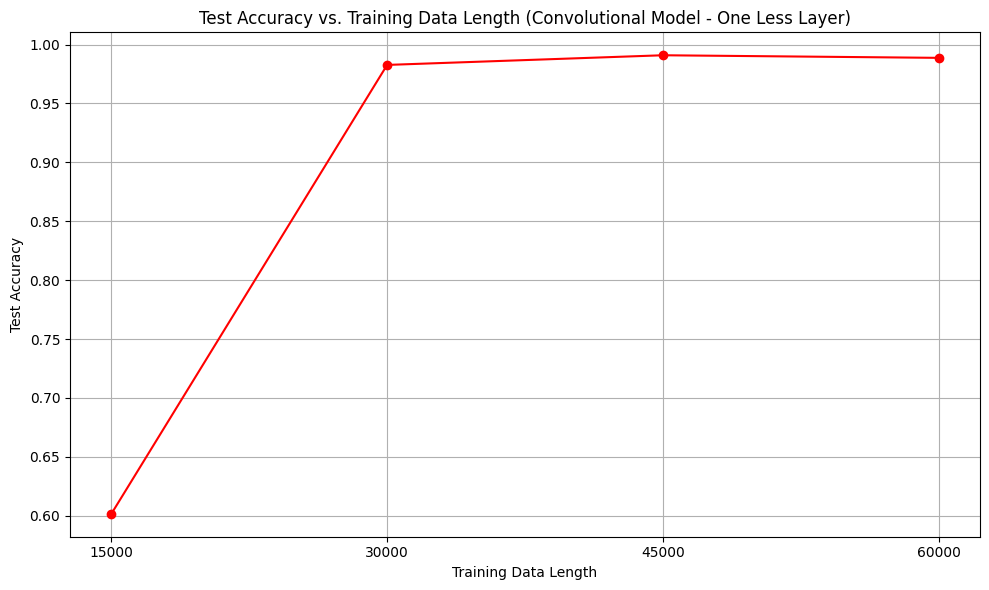

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(convolutional_less_layer_data['Training Data Length'], convolutional_less_layer_data['Test Accuracy'], marker='o', linestyle='-', color='r')
plt.title('Test Accuracy vs. Training Data Length (Convolutional Model - One Less Layer)')
plt.xlabel('Training Data Length')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(convolutional_less_layer_data['Training Data Length'], [f'{length}' for length in convolutional_less_layer_data['Training Data Length']])
plt.tight_layout()
plt.show()

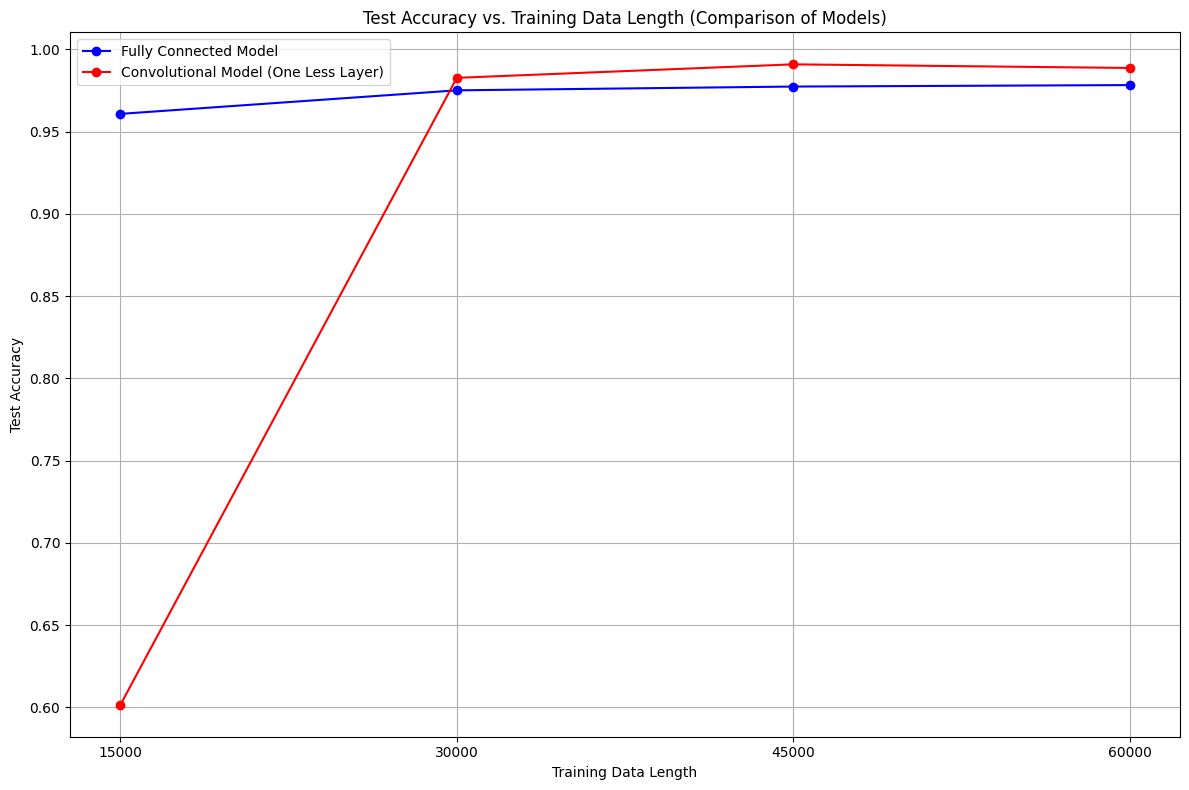

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(fullyconnecteddata['Training Data Length'], fullyconnecteddata['Test Accuracy'], marker='o', linestyle='-', color='b', label='Fully Connected Model')
plt.plot(convolutional_less_layer_data['Training Data Length'], convolutional_less_layer_data['Test Accuracy'], marker='o', linestyle='-', color='r', label='Convolutional Model (One Less Layer)')
plt.title('Test Accuracy vs. Training Data Length (Comparison of Models)')
plt.xlabel('Training Data Length')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(fullyconnecteddata['Training Data Length'], [f'{length}' for length in fullyconnecteddata['Training Data Length']])
plt.legend()
plt.tight_layout()
plt.show()

## Great results!

But wouldn't it be nice if we could visualize those convolutions so that we can see what the model is seeing?